In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Reviews.csv')
data = data[:500]
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
eg = data['Text'][50]
eg

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

1) VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
Takes all the words in a sentence, gives a value to each of the word positive negative or zero and combines up by a math equation for all the words to determine how positive negative or neutral the sentence is. It does not account for the relationship between the words which is important in human speech. But atleast is a good start.
 1) Stop words are removed
 2) each word is scored and combined to a total score
We will use nltk's `SentimentIntensityAnalyzer` to get the neg/neu.pos scored of the text


In [4]:
# VADER Sentiment Scoring 
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm # for loops

sia = SentimentIntensityAnalyzer() # oject

sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

##### 0 <= pos neg neu <= 1 
##### -1 <= comp <= 1

In [5]:
sia.polarity_scores(eg)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [6]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(data.iterrows(), total = len(data)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [7]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [8]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(data, how='left')
vaders # sentiment score with metadata

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


#### If score is 5 star likely to be positive review , likewise for 1 star 
#### Lets see if our data agrees with this hypothesis by a bar plot
### Plot VADER results 

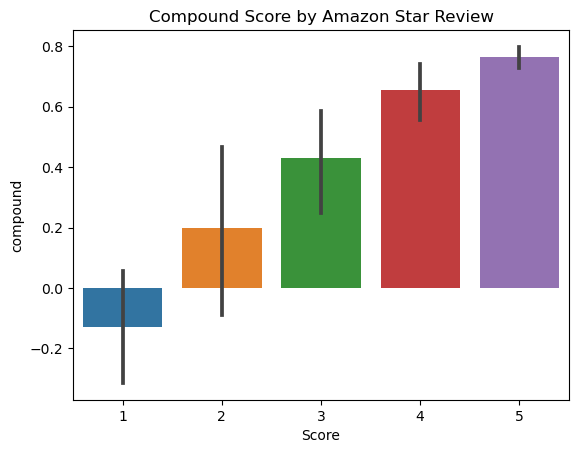

In [9]:
import seaborn as sns
ax = sns.barplot(data=vaders, x = 'Score', y = 'compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

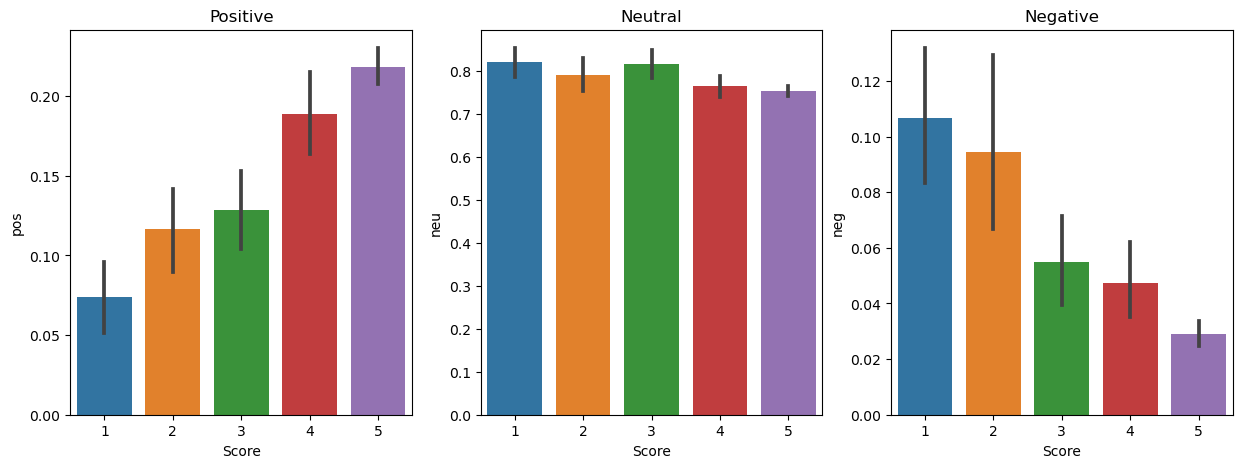

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=vaders, x = 'Score', y = 'pos', ax = axs[0])
sns.barplot(data=vaders, x = 'Score', y = 'neu', ax = axs[1])
sns.barplot(data=vaders, x = 'Score', y = 'neg', ax = axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.show()

* positivity is high as star goes up
* negativity is low as the star is low
* neutral is flat

## Roberta pretrained model
* Use a model trained on large corpus of data
* Transformer model accounts for the words but also the context related to other words

In [11]:
from transformers import AutoTokenizer # tokenize similar to nltk
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax # apply on output to smoothen between 0 and 1 as they dont have it already applied

In [12]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

C:\Users\SHREYA\anaconda3\lib\site-packages\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\SHREYA\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


This will fetch the weights from a already built model and apply it on our text to perform similar kind of sentiment analysis. We can use this to tokenize the sentence and model to give the scores

In [15]:
# Vader result on example
print(eg)
sia.polarity_scores(eg)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [16]:
# Run for roberta model
# step1 : encoding the text, pt means pytorch : encoding into embeddings that the model will understand
encoded_text = tokenizer(eg, return_tensors='pt')
encoded_text

{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [17]:
# model will return output in the form of tensors
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [18]:
# detach the output and apply softmax
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.97635514, 0.02068747, 0.00295737], dtype=float32)

neg neu pos scores respectively

In [19]:
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.02068747, 'roberta_pos': 0.0029573708}


In [22]:
def get_roberta_polarity_scores(eg):
    encoded_text = tokenizer(eg, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
        }
    return scores_dict
    

In [37]:
# Run both 
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(data.iterrows(), total = len(data)):
    try:
        text = row['Text']
        myid = row['Id']
        vaders_result = sia.polarity_scores(text)
        vaders_result_renamed = {}
        for key, val in vaders_result.items():
            vaders_result_renamed[f'vaders_{key}'] = val
        roberta_result = get_roberta_polarity_scores(text)
        both = {**vaders_result_renamed, **roberta_result}
        res[myid] = both
    except:
        print(f"break at {myid}")

  0%|          | 0/500 [00:00<?, ?it/s]

break at 83
break at 187


In [35]:
both
# input sentence can be max 514 units long 

{'vaders_neg': 0.0,
 'vaders_neu': 0.695,
 'vaders_pos': 0.305,
 'vaders_compound': 0.9441,
 'roberta_neg': 0.009624245,
 'roberta_neu': 0.049980413,
 'roberta_pos': 0.94039536}

In [39]:
results_data = pd.DataFrame(res).T
results_data = results_data.reset_index().rename(columns={'index':'Id'})
results_data = results_data.merge(data, how='left')
results_data.head() # sentiment score with metadata

,Id,vaders_neg,vaders_neu,vaders_pos,vaders_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [40]:
## Compare scores between models
results_data.columns

Index(['Id', 'vaders_neg', 'vaders_neu', 'vaders_pos', 'vaders_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

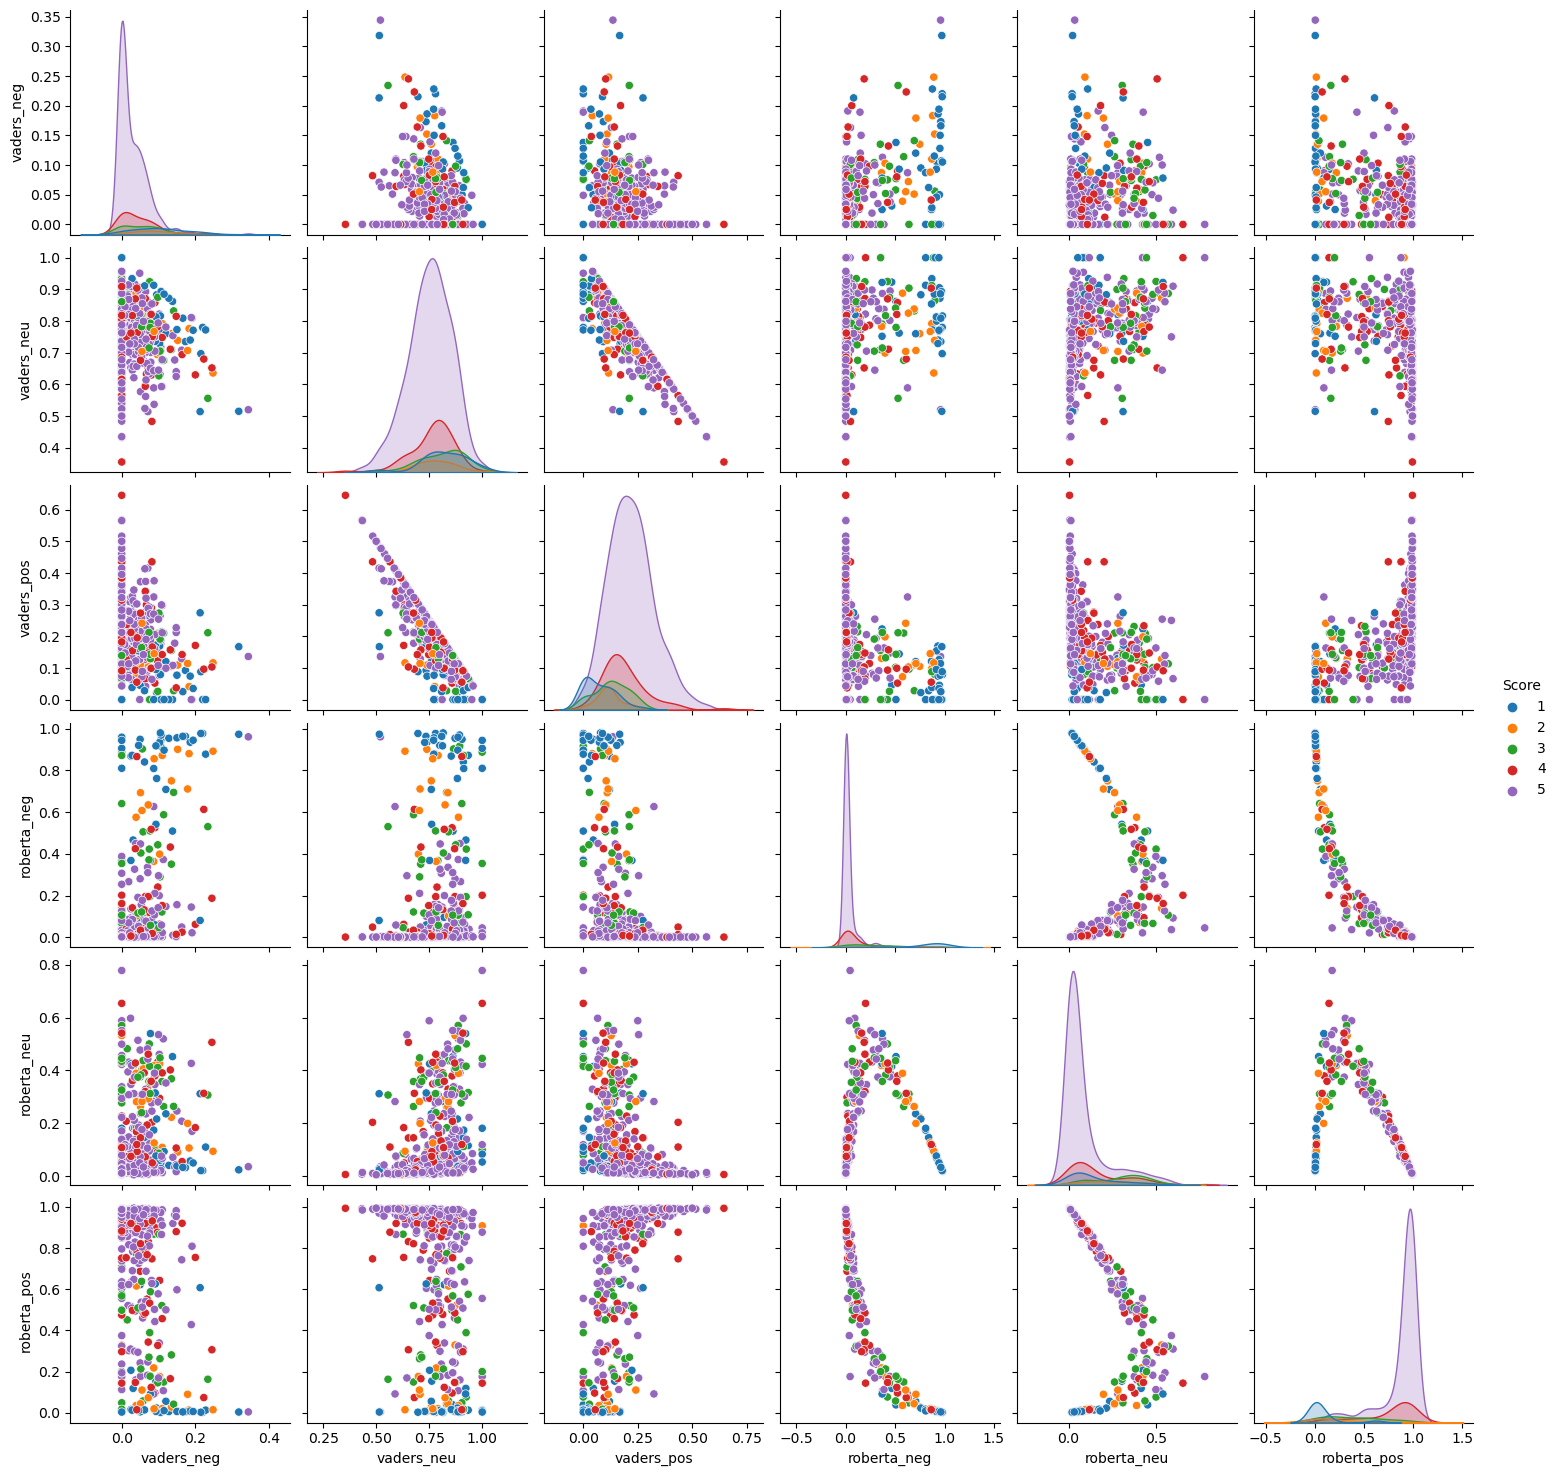

In [42]:
sns.pairplot(data=results_data, 
             vars=['vaders_neg', 'vaders_neu', 'vaders_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'], 
             hue='Score', 
             palette='tab10')
plt.show()

In [50]:
results_data.query("Score == 5").sort_values("roberta_neg", ascending=False)['Text'].values[0]


'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [51]:
results_data.query("Score == 1").sort_values("roberta_pos", ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [52]:
results_data.query("Score == 5").sort_values("vaders_neg", ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [53]:
results_data.query("Score == 1").sort_values("roberta_pos", ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

## The transformers Pipeline

In [43]:
from transformers import pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [44]:
sentiment_pipeline('I love it')

[{'label': 'POSITIVE', 'score': 0.9998799562454224}]